<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h2 style="color: #FF8C00;">Instructions:</h2>

- **Collaboration**: You are working in **pairs**, so collaborate to create a comprehensive `README` file that outlines your project, methodologies, and findings.
- **Presentation**: Prepare and deliver a presentation that summarizes your analysis, demonstrating the depth and breadth of your work.
- **Python scripts**: You can use the this notebook or the `EDA_template` as template for your findings, but you'll have to deliver a different notebook to GitHub.
- **Extended Analysis**: Dive deeper into the data to uncover additional insights. Push the boundaries of your analysis to explore complex interactions within the portfolio.

<h1 style="color: #FF8C00;">Libraries</h1>

<h3 style="color: #FF6347;">-- Insert your code here --</h3>

---

Make sure to import all the libraries you will need to complete your tasks in this challenge.

In [5]:
#Cleaning and numerical libraries
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

<h3 style="color: #FF6347;">Data Loading</h3>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [8]:
df1 = pd.read_csv(r"C:\Users\HP\Desktop\Ironhack\Projects\quest_portfolio_analysis\asset_price_data.csv")

In [9]:
df1.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [10]:
df1.shape

(783, 6)

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [13]:
df1_returns = df1.copy()

In [14]:
df1_returns.isna().sum()

date       0
Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64

In [15]:
df1_returns.duplicated().sum()

0

In [16]:
#Filling all NaN values with the the last valid observation in each column.
df1_returns = df1_returns.fillna(method='ffill')

C:\Users\HP\AppData\Local\Temp\ipykernel_21708\2157764224.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1_returns = df1_returns.fillna(method='ffill')


In [17]:
df1_returns.isna().sum()

date      0
Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

In [18]:
#The method pct_change(1) provides us a straightfoward solution to get daily changes in asset values
def daily_percentage_returns(data):
    data = data.pct_change(1) * 100
    return data

In [19]:
for x in range(1,6):
    df1_returns[f"Asset{x}"] = daily_percentage_returns(df1_returns[f"Asset{x}"])

In [34]:
df1_returns

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2,2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
3,2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
4,2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...,...
778,2021-12-27,-0.091306,0.738415,0.543901,0.000000,1.344319
779,2021-12-28,0.006442,0.548309,0.759918,0.000000,-0.114106
780,2021-12-29,-0.486243,-0.158812,-0.664707,0.017523,-0.314151
781,2021-12-30,-0.069556,0.290341,0.334577,0.026280,0.143246


In [36]:
df_new = df1_returns.copy()

In [42]:
df_new.dropna(inplace=True)

<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [ ]:
num = df_new.select_dtypes(include="number") #creating a df taht only contains numerical variables, in other words only asset columns

In [56]:
correlation_matrix = num.corr()

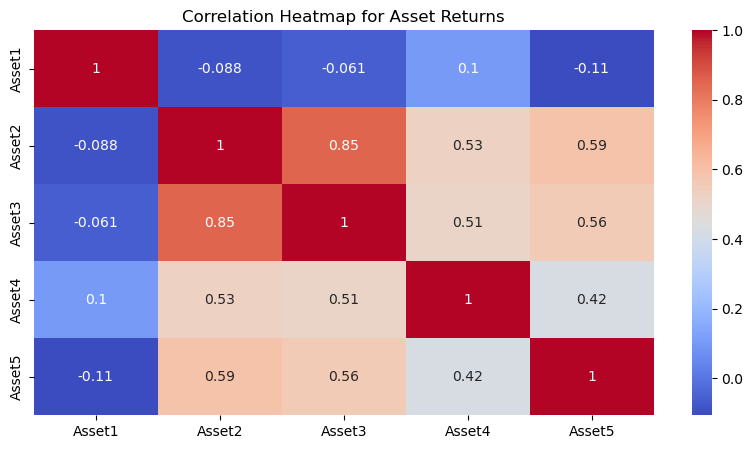

In [62]:
# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(10, 5))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Asset Returns")
plt.show()

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

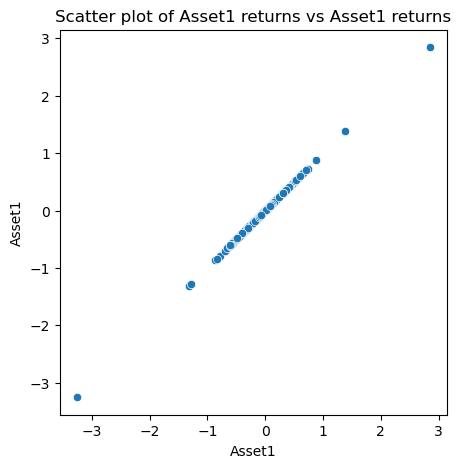

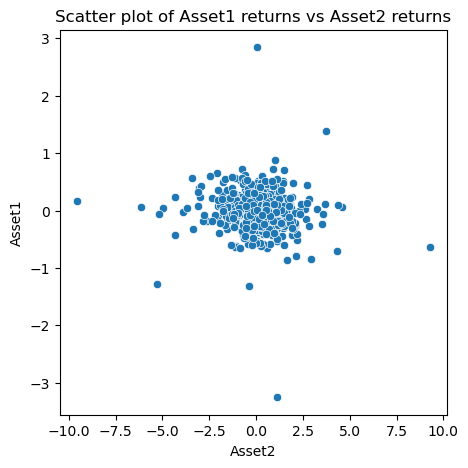

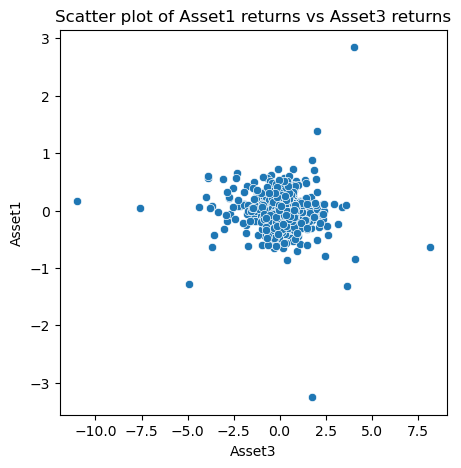

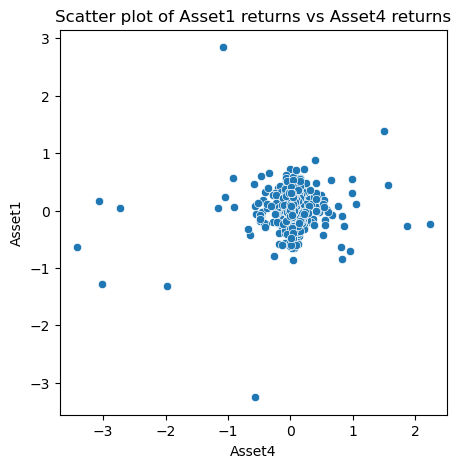

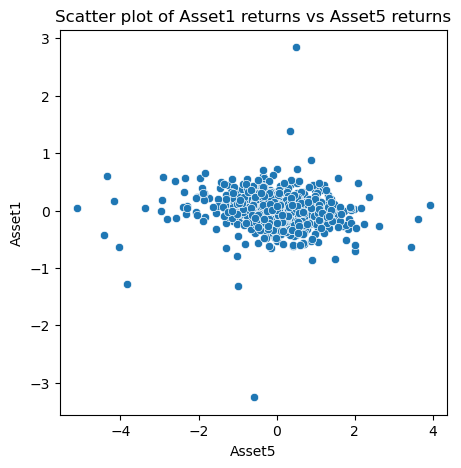

In [66]:
# Plotting scatter plots for each asset returns against 'Asset1' returns to visualize their relationships
for col in num.columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of Asset1 returns vs ' + col + " returns")
    sns.scatterplot(data=num, x=col, y='Asset1')
    plt.show()

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

In [139]:
df_weights = pd.read_csv(r"C:\Users\HP\Desktop\Ironhack\Projects\quest_portfolio_analysis\portfolio_weights.csv")

In [141]:
df_weights.shape

(783, 6)

In [143]:
df_weights.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [145]:
df_weights_new = df_weights.copy()

In [149]:
df_weights_new["date"] = pd.to_datetime(df_weights_new["date"]) #transforming column date into datetime format so that we can set it as a dateIndex

In [151]:
df_weights_new.set_index("date", inplace=True)  # setting "date" column as the index

In [153]:
df_weights_new.head()

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [155]:
df_weights_quarter = df_weights_new.resample('Q').mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_21708\2624127833.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_weights_quarter = df_weights_new.resample('Q').mean()


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1200x600 with 0 Axes>

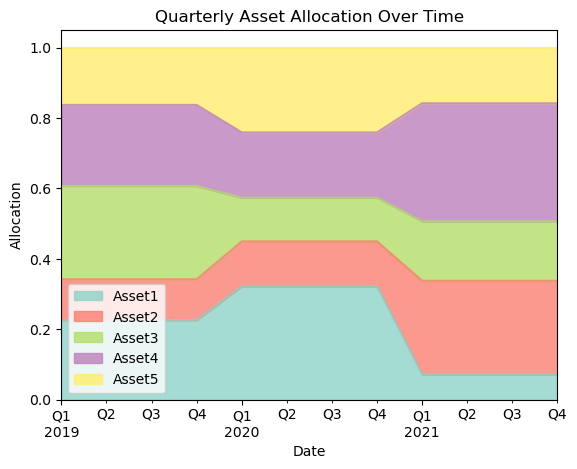

In [157]:
# Plotting the area chart
plt.figure(figsize=(12, 6))
df_weights_quarter.plot.area(stacked=True, alpha=0.8, cmap='Set3') 
plt.xlabel('Date')
plt.ylabel('Allocation')
plt.title('Quarterly Asset Allocation Over Time')
plt.show

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

In [ ]:
## Adapted from https://www.codingfinance.com/post/2018-04-10-cumulative-portfolio-returns-py/

In [165]:
df_returns_new = df_new.copy() #creating a copy from the final daily returns dataframe from Exercise 2

In [167]:
df_returns_new["date"] = pd.to_datetime(df_returns_new["date"])
df_returns_new.set_index("date", inplace=True)
df_returns_new #setting date column as datetimeIndex

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179
2019-01-09,0.197561,1.291853,0.227193,0.411970,1.400345
...,...,...,...,...,...
2021-12-27,-0.091306,0.738415,0.543901,0.000000,1.344319
2021-12-28,0.006442,0.548309,0.759918,0.000000,-0.114106
2021-12-29,-0.486243,-0.158812,-0.664707,0.017523,-0.314151


In [186]:
# Creating a new df with daily returns times daily weights
df_returns_weight = df_returns_new * df_weights_new.iloc[1:]

In [188]:
df_returns_weight 

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-03,-0.045821,-0.186840,-0.151026,-0.062342,-0.153719
2019-01-04,-0.061772,0.243603,0.669272,-0.025919,0.313599
2019-01-07,-0.034083,0.146849,-0.194447,0.042739,0.241068
2019-01-08,-0.034605,0.011659,0.186556,0.083034,-0.003126
2019-01-09,0.044542,0.150184,0.060207,0.094881,0.228220
...,...,...,...,...,...
2021-12-27,-0.006511,0.196487,0.091797,0.000000,0.212880
2021-12-28,0.000459,0.145901,0.128255,0.000000,-0.018069
2021-12-29,-0.034673,-0.042259,-0.112186,0.005879,-0.049748


In [192]:
port_ret = df_returns_weight.sum(axis=1) #adding the rows to get the weighted return for each day

In [204]:
cumulative_ret = (port_ret + 1).cumprod()
final_cumulative_ret.resample('Q').mean()

C:\Users\HP\AppData\Local\Temp\ipykernel_21708\2722086978.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  final_cumulative_ret = cumulative_ret.resample('Q').mean()


In [210]:
cumulative_ret

date
2019-01-03    0.400252
2019-01-04    0.856051
2019-01-07    1.029081
2019-01-08    1.279682
2019-01-09    2.019382
                ...   
2021-12-27    0.000623
2021-12-28    0.000782
2021-12-29    0.000600
2021-12-30    0.000696
2021-12-31    0.000610
Length: 782, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

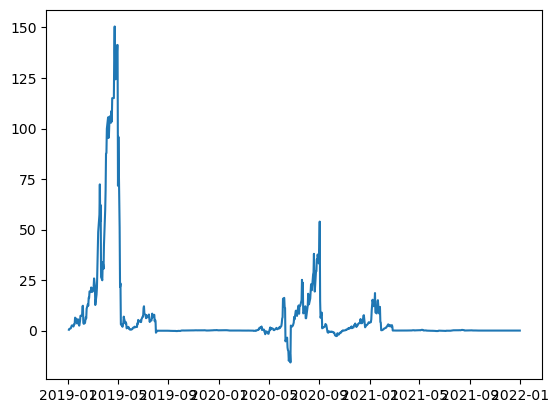

In [208]:
plt.plot(cumulative_ret)
plt.show

<h2 style="color: #FF6347;">Annualized Return.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Annualized Volatility.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>

<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>
<h3 style="color: #FF6347;">-- Insert your code here --</h3>